In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

In [10]:
import pandas as pd

In [2]:
x, y = make_circles(n_samples=1000)

In [3]:
x.shape, y.shape

((1000, 2), (1000,))

In [4]:
x[0]

array([ 0.50215309, -0.62276984])

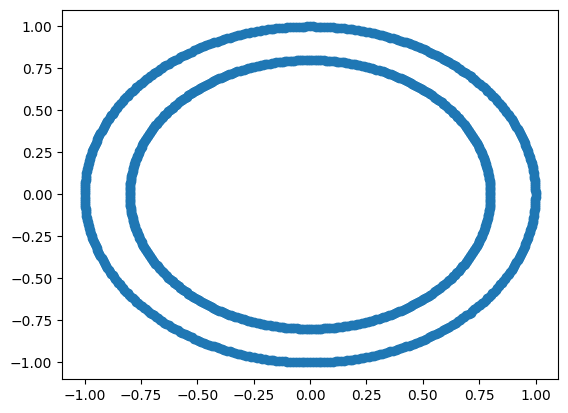

In [5]:
plt.scatter(x[:, 0], x[:, 1])

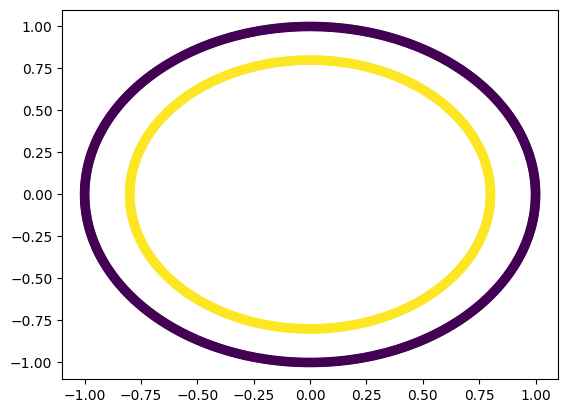

In [6]:
plt.scatter(x[:, 0], x[:, 1], c=y)

In [7]:
x, y = make_circles(n_samples=1000, noise = 0.03, random_state=42)


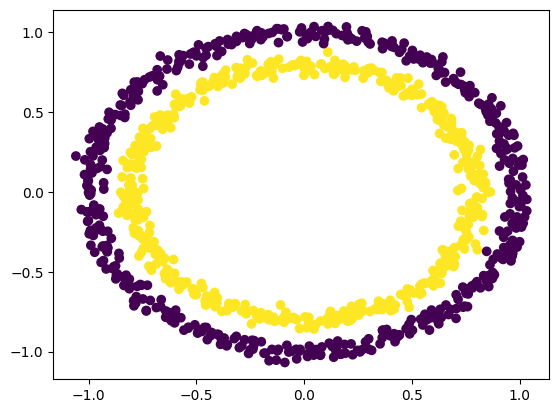

In [8]:
plt.scatter(x[:, 0], x[:, 1], c=y)

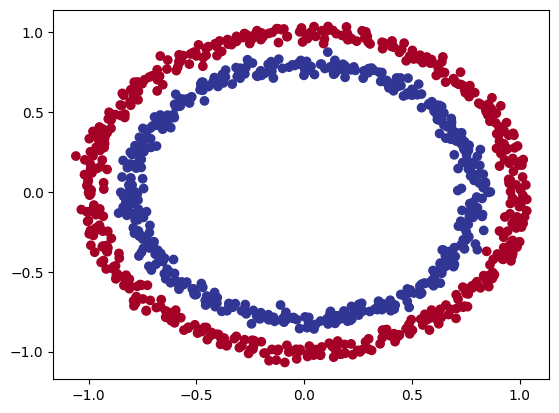

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [11]:
circle_df =pd.DataFrame({'x0':x[:, 0], 'x1':x[:, 1], 'label':y})
circle_df.head()


,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [12]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_1 = model_1.fit(x, y, epochs=100, verbose=0)

In [13]:
model_1.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5173 - loss: 0.1733  


[0.17328961193561554, 0.5170000195503235]

In [14]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(x, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.1733  


[0.17328977584838867, 0.5]

In [16]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_3 = model_3.fit(x, y, epochs=100, verbose=0)

In [17]:
model_3.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - loss: 0.1733


[0.17336541414260864, 0.5009999871253967]

In [18]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_4 = model_4.fit(x, y, epochs=100, verbose=0)
model_4.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 2.7068e-04


[0.00034137957845814526, 1.0]

In [20]:
def plot_decisin_boundary(model, x, y):
  x_min, x_max = x[:, 0].min() - 0.1, x[:, 0].max() + 0.1
  y_min, y_max = x[:, 1].min() - 0.1, x[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  y_pred = np.round(y_pred)
  zz = y_pred.reshape(xx.shape)
  plt.contourf(xx, yy, zz, cmap=plt.cm.RdYlBu)
  plt.scatter(x[:, 0], x[:, 1], c=y)
  plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


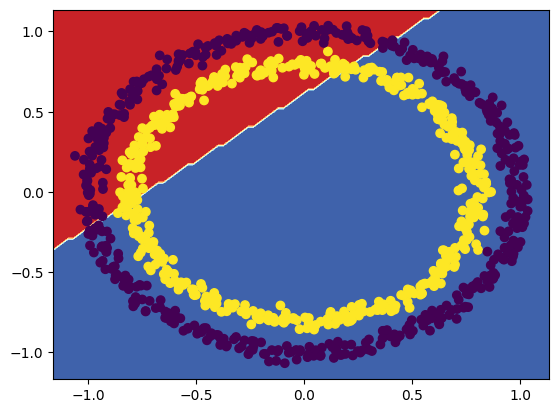

In [22]:
plot_decisin_boundary(model_1, x, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


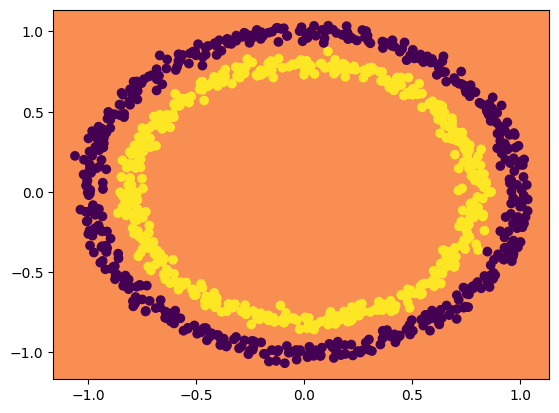

In [23]:
plot_decisin_boundary(model_2, x, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


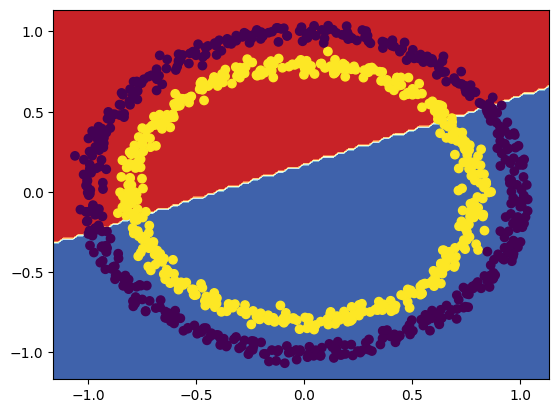

In [24]:
plot_decisin_boundary(model_3, x, y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


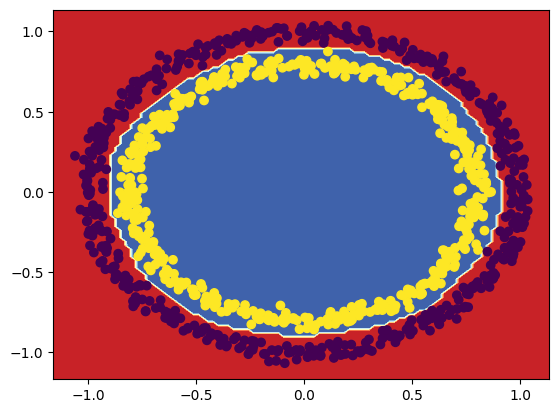

In [21]:
plot_decisin_boundary(model_4, x, y)

# din modelul 4 care merge bine, putem sa facem un downscale?

In [25]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_5 = model_5.fit(x, y, epochs=100, verbose=0)
model_5.evaluate(x, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0047  


[0.004659571219235659, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


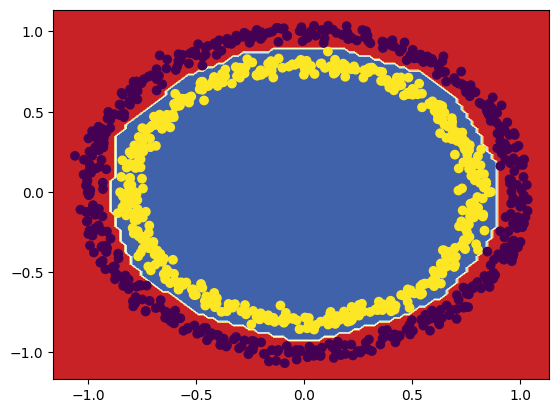

In [26]:
plot_decisin_boundary(model_5, x, y)

In [27]:
model_5.save('model_5.keras')

In [28]:
model_6 =  tf.keras.models.load_model('model_5.keras')

In [29]:
type(model_6), type(model_5)

(keras.src.models.sequential.Sequential,
 keras.src.models.sequential.Sequential)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


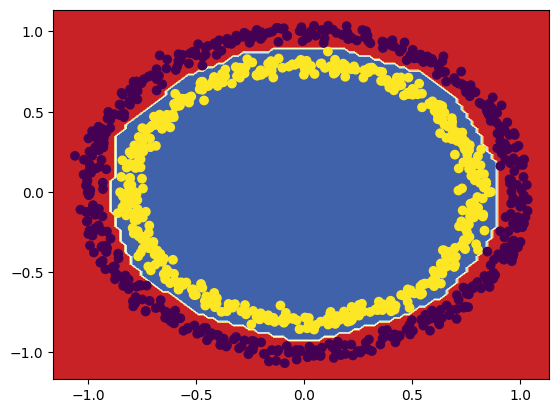

In [30]:
plot_decisin_boundary(model_6, x, y)